# Five Personality Traits Clustering with K-Means and 
# Assigment 3

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:

* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extroversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)


This data set was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed from the IPIP. You can see more from https://www.kaggle.com/datasets/tunguz/big-five-personality-test 


The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

You can see the questions in the codebook.txt or at the https://ipip.ori.org/new_ipip-50-item-scale.htm website and from the Goldberg paper 

Resources:

[1].Goldberg, L. R. (1992). The development of markers for the Big-Five factor structure. Psychological Assessment, 4, 26-42.

[2]https://openpsychometrics.org/tests/IPIP-BFFM/




In [2]:
!pip install seaborn==0.9.0

In [3]:
pip install numpy==1.16.1

  Using cached numpy-1.16.1.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\sadie nathan\.conda\envs\miniproject\lib\site-packages\numpy-1.24.3.dist-info\
   from C:\Users\Sadie Nathan\.conda\envs\MiniProject\Lib\site-packages\~umpy-1.24.3.dist-info
  Moving to c:\users\sadie nathan\.conda\envs\miniproject\lib\site-packages\numpy\
   from C:\Users\Sadie Nathan\.conda\envs\MiniProject\Lib\site-packages\~umpy
  Moving to c:\users\sadie nathan\.conda\envs\miniproject\scripts\f2py.exe
   from C:\Users\Sadie Nathan\AppData\Local\Temp\pip-uninstall-nl9p6oiy

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [288 lines of output]
      Running from numpy source directory.
      C:\Users\Sadie Nathan\AppData\Local\Temp\pip-install-o86bmzun\numpy_c804465d43144858bc1297c9a2bcecb6\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['c:\\Users\\Sadie Nathan\\.conda\\envs\\MiniProject\\lib', 'C:\\', 'c:\\Users\\Sadie Nathan\\.conda\\envs\\MiniProject\\libs', 'C:\\ProgramData\\Anaconda3\\Library\\lib']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        librar

In [10]:
!pip install scikit-learn

In [11]:
import sklearn

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

In [7]:
pip install "numpy<1.24.0" "pandas==1.5.3"


  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached pandas-1.5.3-cp39-cp39-win_amd64.whl (10.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Sadie Nathan\\.conda\\envs\\MiniProject\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [1]:
import numpy as np
import pandas as pd

## Loading the Data Set
The dataset is quite big, it might take a while.

In [2]:

data = pd.read_csv('data/data-small.csv', dtype = {"col1":np.float_})
pd.options.display.max_columns = 150

print('Number of participants: ', len(data))
data.head()


Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


## Understanding the Data Set

In [3]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  4504
Number of participants after eliminating missing values:  49906


In [4]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [14]:
#Load in questions databank
import json
with open("data/questions.json", "r") as fp:
    questions = json.load(fp)
traits = list(questions.keys())
colours = plt.colormaps.get("rainbow")

In [ ]:
#Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

def questions_for_trait(trait):
    return list(questions[trait].values())

#Plot histogram for responses to each question
def vis_questions(trait, color):
    fig, ax = plt.subplots(2,5,figsize=(12,2))
    plt.subplots_adjust(bottom=0, top=2.5)
    qs = questions_for_trait(trait)
    codes = keys_for_trait(trait)
    for i in range(10):
        plot = ax[int(np.floor(i/5)),i%5]
        plot.hist(data[codes[i]], bins=14, color= color, alpha=.5)
        plot.set_title(qs[i], fontsize=8)
        plot.set_yticks([])
        plot.set_xticks(np.arange(0,6))

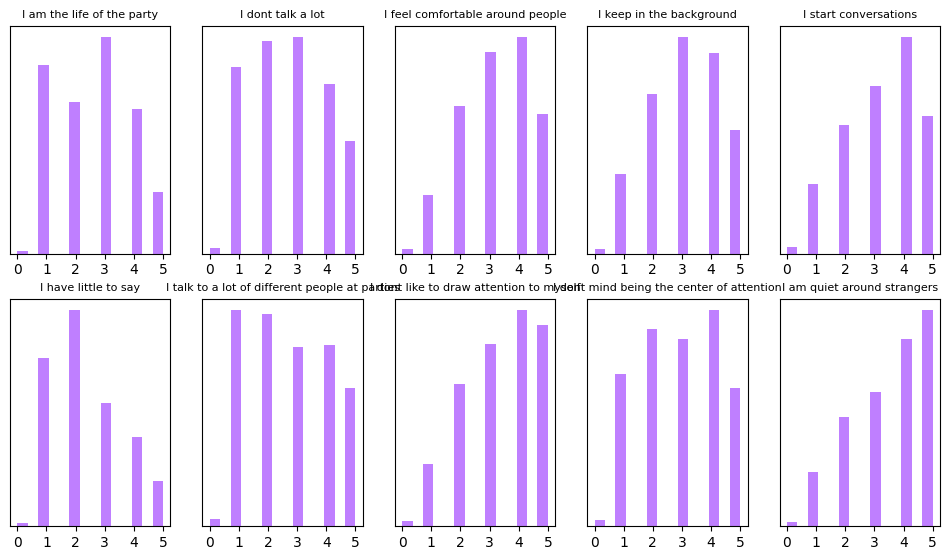

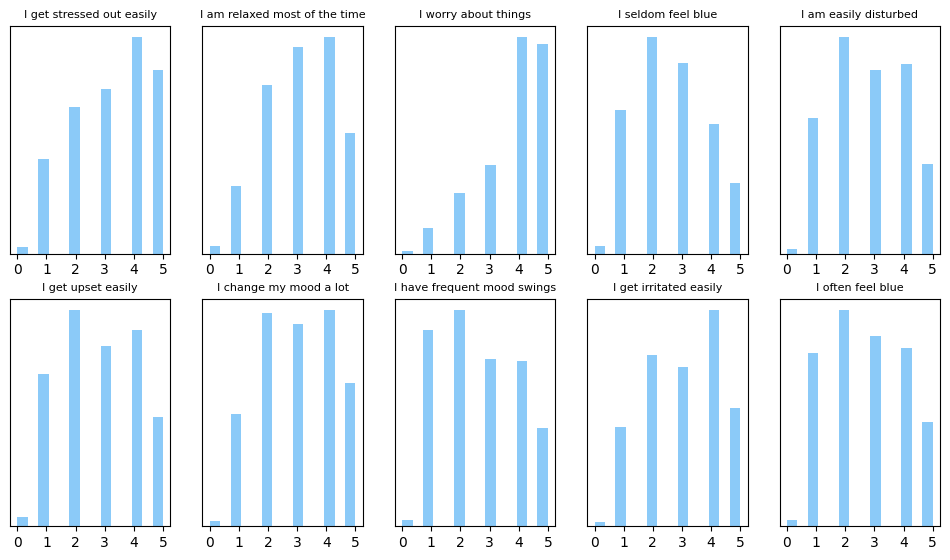

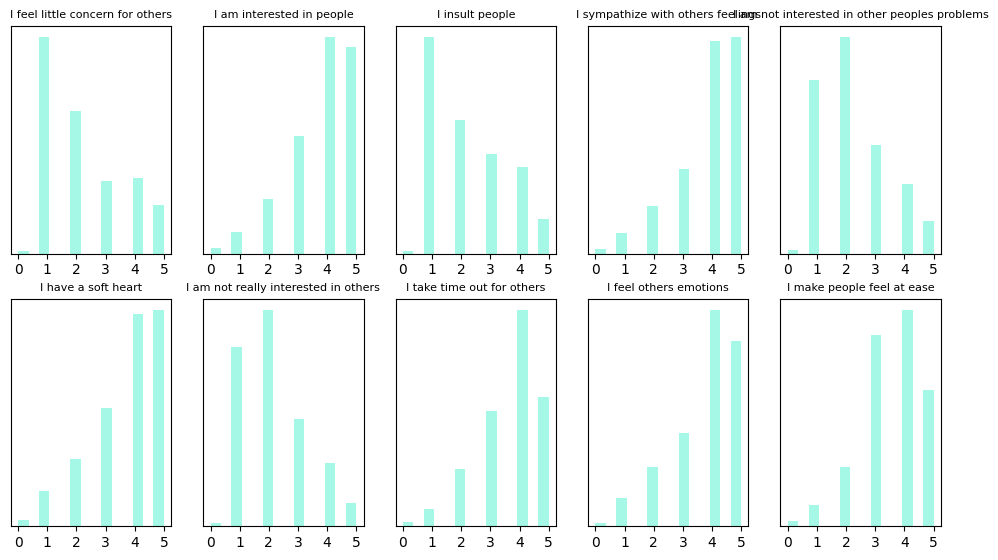

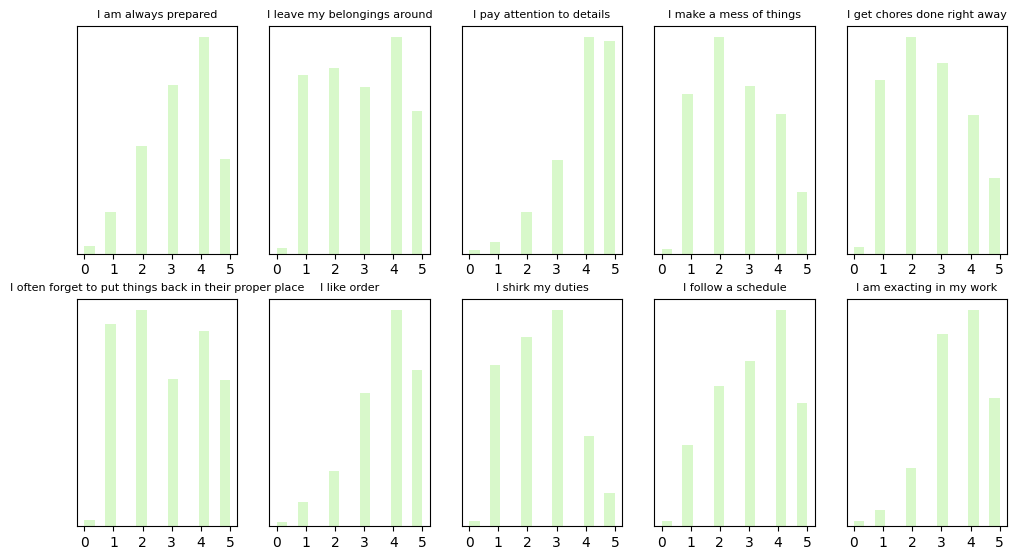

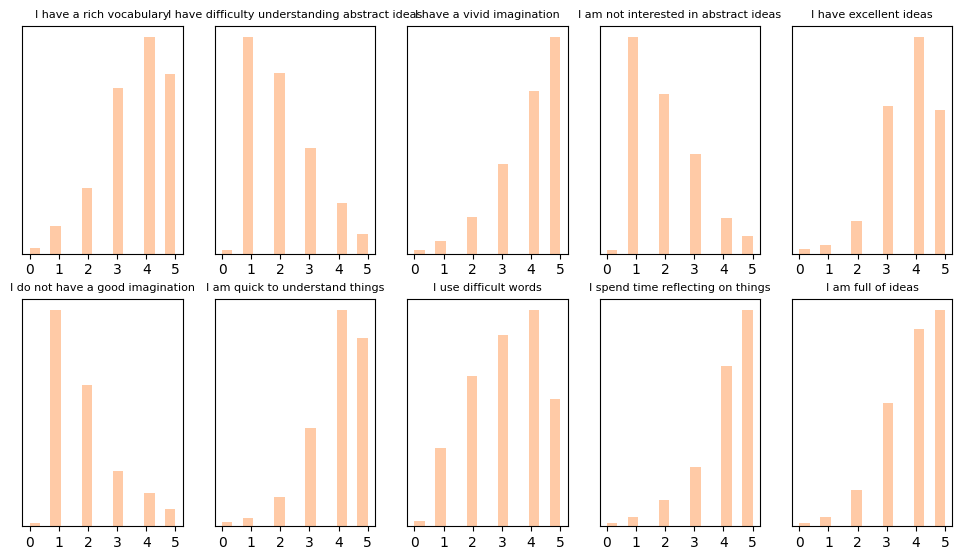

In [ ]:
#Plot all questions
for i,t in enumerate(traits):
    vis_questions(t, colours(i/5)) 

## How many clusters should we define?

Clustering is a task of identifying similar instances and assigning them to clusters or groups of similar interest. (Geron, 2023)

In [15]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [16]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [17]:
import warnings
warnings.filterwarnings("ignore")

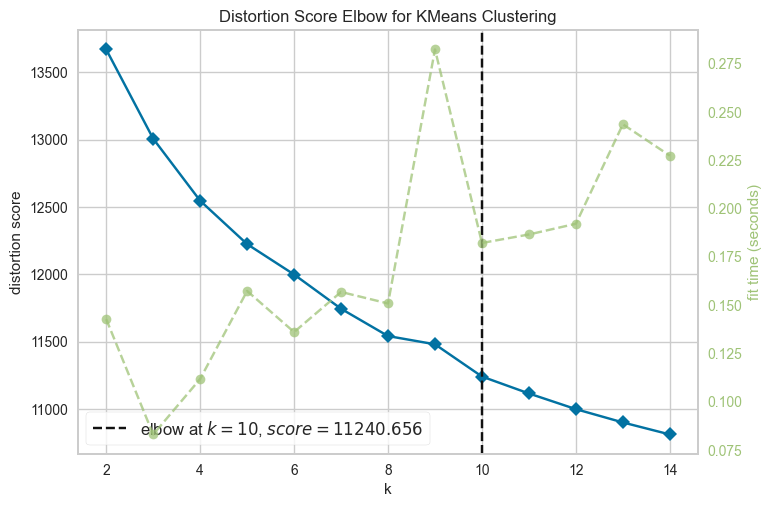

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

As you can see 5 clusters looks optimum for the data set and we already know this researh is to identify 5 different personalities.

## Clustering Participants into 5 Personality Groups



## K-Means

[K-means](http://https//www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [19]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# Use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# Define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [20]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,549499,2.0,3.0,2.0,2.0,...,4.0,3.0,3.0,4.0,3
1,811367,2.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,0
2,450151,4.0,1.0,5.0,1.0,...,5.0,5.0,5.0,5.0,3
3,919073,1.0,4.0,3.0,5.0,...,5.0,5.0,4.0,4.0,4
4,894414,3.0,1.0,4.0,3.0,...,3.0,2.0,4.0,4.0,4


## Analysing the Model and Predictions

How many individual do we have for each cluster?

In [21]:
df_model.Clusters.value_counts()

Clusters
2    10371
1    10130
3     9998
0     9804
4     9603
Name: count, dtype: int64

Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [22]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,717495.622297,2.637495,2.765708,3.248776,3.140555,3.264382,2.348327,2.738372,3.393105,2.966238,3.560282,3.290086,3.119645,3.841289,2.619441,2.822215,2.825581,3.049980,2.697980,3.103427,2.804468,2.221338,3.833027,2.288862,3.929825,2.279682,3.716136,2.197980,3.680641,3.774786,3.580579,3.311608,2.977764,3.980518,2.613729,2.592513,2.859853,3.681457,2.458078,3.180029,3.605059,3.719604,1.991024,4.026724,1.909119,3.830375,1.877193,4.005916,3.286822,4.194818,4.004998
1,311978.410958,2.672655,2.759329,3.296841,3.144719,3.291609,2.430207,2.799506,3.423100,2.956861,3.538697,3.323001,3.147779,3.887364,2.713425,2.894274,2.900691,3.091214,2.734057,3.107996,2.772853,2.327443,3.821323,2.259724,3.935439,2.272754,3.772458,2.192794,3.693189,3.813722,3.611451,3.279961,2.924975,3.995262,2.668312,2.692103,2.859230,3.686081,2.491115,3.194571,3.588351,3.610661,2.176308,3.987759,2.099605,3.759625,1.911945,3.939783,3.106120,4.074432,3.933268
2,104517.171632,2.624723,2.823643,3.270273,3.189856,3.239900,2.503230,2.765693,3.444316,2.977148,3.585479,3.216758,3.248288,3.828464,2.680937,2.807251,2.828657,3.054961,2.660592,3.102208,2.757111,2.299489,3.788931,2.353871,3.890271,2.308167,3.720181,2.238839,3.650082,3.741973,3.544113,3.264873,2.964131,3.933854,2.641307,2.563012,2.846302,3.675634,2.505544,3.147237,3.547970,3.639765,2.109633,3.987658,2.069617,3.753833,1.922283,3.969820,3.156590,4.078488,3.910520
3,516321.089718,2.645029,2.757952,3.282657,3.125425,3.285357,2.402280,2.787257,3.419384,2.979096,3.532106,3.287457,3.167934,3.834267,2.677435,2.843069,2.833567,3.042909,2.673135,3.090118,2.779256,2.277355,3.831066,2.252551,3.910382,2.251650,3.741448,2.200540,3.684437,3.781656,3.601120,3.288958,2.899280,3.994399,2.598120,2.643729,2.822164,3.718344,2.470794,3.210742,3.589918,3.646329,2.064013,4.004801,1.990198,3.817564,1.894179,3.967794,3.191138,4.126325,3.986497
4,914746.261481,2.663751,2.745913,3.325003,3.132875,3.315110,2.332396,2.788920,3.393315,2.973550,3.541914,3.296574,3.139123,3.864834,2.631886,2.829949,2.830678,3.034260,2.667708,3.052588,2.780694,2.193585,3.877226,2.176611,3.973133,2.239717,3.775070,2.164948,3.730397,3.824742,3.621368,3.358534,2.910132,3.993231,2.546600,2.687285,2.775903,3.750391,2.392586,3.271269,3.643757,3.702281,2.029158,4.007394,1.926794,3.837030,1.870249,4.012913,3.225242,4.179527,3.992711


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [23]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.650296,3.092993,3.072674,3.123613,3.244665
1,2.677483,3.133850,3.086170,3.140306,3.225459
2,2.683878,3.101360,3.074892,3.108601,3.223566
3,2.668444,3.098200,3.071034,3.124765,3.229226
4,2.667083,3.088951,3.073612,3.130730,3.243434


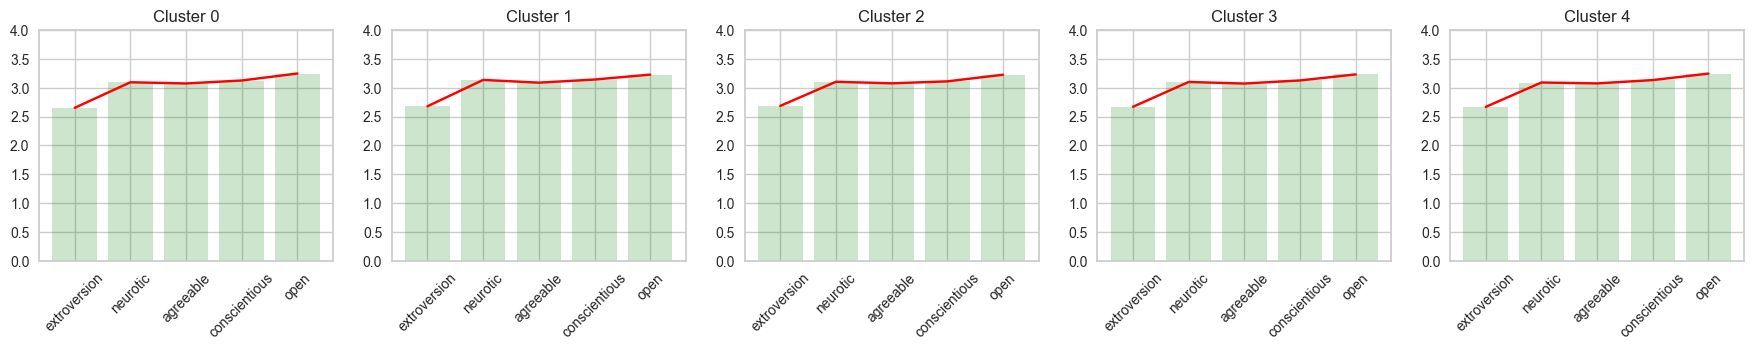

In [24]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i,:], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i,:], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

## Visualizing the Cluster Predictions

## PCA

[Principal Component Analysis (PCA)](https://rpubs.com/cyobero/pca-clustering#:~:text=Principal%20Component%20Analysis%20(PCA)%20is%20an%20unsupervised%20machine%20learning%20technique,Visualizing%20High%2DDimensional) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.

In [25]:
# In order to visualize in 2D graph, PCA will be used
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,44046.698174,0.308297,3
1,305914.698169,2.167409,0
2,-55301.301826,-3.933230,3
3,413620.698174,3.313694,4
4,388961.698176,-0.857757,4


In [26]:
df_pca = df_pca.astype(np.float_)
df_pca.dtypes

PCA1        float64
PCA2        float64
Clusters    float64
dtype: object

In [28]:
#plt.figure(figsize=(10, 10))
#sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
#plt.title('Personality Clusters after PCA') #this function did work but has decided not to anymore, for the purpose of the task it isn't important
#so I've decided to leave it for now

## Implementing the Model to See My Personality

I answered the questions in an Microsoft Excel spread sheet. 
Then I added that data into this notebook and put my answers to the model to see in which category I will be.

In [29]:
%pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [30]:

my_data = pd.read_csv('data/data_personality.csv')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [31]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
# my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open
0,3.0,2.4,3.4,3.3,3.4


# In class exercise 
 Make an excel sheet that contains your answers to the Big Five Personality Questionnaires. You can see the template in my_data 

 The way you create your data is by answering the Big Five Personality (on the scale 1 - 5 with 1 being very inacccurate to 5 very accurate) for all the questions. Save as excel or csv and input it with the corect path. You can also see the template for filling out the questionnaire here: https://artslondon-my.sharepoint.com/:x:/g/personal/u_octaviani_arts_ac_uk/EW3hJdb8R9lEt3TzFYlZRwEBT6m9zt5ov7uJJsDXFVmCTA?e=YzUfwH

As a reminder the questions are : https://ipip.ori.org/new_ipip-50-item-scale.htm 

In [32]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [33]:
# optional if you use excel. Use: pip install openpyxl
your_data = pd.read_excel ('data/5personalities.xlsx')

In [34]:
# Change this to your data

col_list = list(my_data)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open
0,3.0,2.4,3.4,3.3,3.4


# Assignment 3





# Tasks

In the questions, there is a clear self judgement bias where positive attributes (“I have a rich vocabulary) are rated higher than negative ones (“I do not have a good imagination”). This is demonstrated by steep negative or positive skews in the data 

A variety of these within a trait balances itself out as we can see by the 5 personality types all having reasonably similar means (~3)

## Task 1

Add 5 extra columns, each with the aggregated trait score (the mean of the 10 questions for that trait) for that participant.

Use this to show the mean of each trait over the whole dataset

**TIPS**
You can use ``keys_for_trait()`` to slice out all the questions for a particular trait

## Task 2

Write some code to rank the five traits on how much positive and negative skew there is in response to each question. 

E.g A trait where all of the questions had an equal spread of answers across 0-5 would rank lowly, and one where all the questions either skewed positively (from low to high) or negatively (from high to low) would rank highly 

**TIPS**
The function ``scipy.stat.skew()`` can give you the skew of data for a specific column (e.g. one question)

Again, you can use ``keys_for_trait()`` to slice out all the questions for a particular trait

Remember, highly skewed traits will contain questions skewed both positively and negatively

## Task 1

Add 5 extra columns, each with the aggregated trait score (the mean of the 10 questions for that trait) for that participant.

Use this to show the mean of each trait over the whole dataset

In [35]:

data = pd.read_csv('data/data-small.csv', dtype = {"col1":np.float_})
pd.options.display.max_columns = 150

print('Number of participants: ', len(data))
data.head()

Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


In [36]:
#Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())


In [37]:
keys_for_trait('EXT')

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10']

In [38]:
data = data.drop('country', axis=1)
columns = list(df.columns)

In [39]:
def calculate_trait_means(data, trait): #calculating the mean of the user responses depending on the trait
    trait_keys = keys_for_trait(trait)
    trait_data = data[trait_keys]
    trait_means = trait_data.mean(axis=1)
    return trait_means

extroversion = calculate_trait_means(data, 'EXT') #calculating the means
neuroticism = calculate_trait_means(data, 'EST')
agreeableness = calculate_trait_means(data, 'AGR')
conscientiousness = calculate_trait_means(data, 'CSN')
openness = calculate_trait_means(data, 'OPN')

data['extroversion'] = extroversion #add new values to the dataframe
data['neuroticism'] = neuroticism
data['agreeableness'] = agreeableness
data['conscientiousness'] = conscientiousness
data['openness'] = openness

data #as we can see, 5 new columns have been added with averaged values for each trait

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,extroversion,neuroticism,agreeableness,conscientiousness,openness
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,2.6,3.7,3.0,2.0,2.6
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.9,3.4,3.3,3.2,3.5
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,3.4,2.5,3.6,2.6,3.6
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,2.7,2.4,2.6,2.8,3.4
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,2.7,3.1,2.7,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,777508,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,0.0,5.0,5.0,3.8,4.2,3.4,3.0,2.5
49996,571162,2.0,2.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,5.0,4.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,2.5,3.8,3.3,3.2,2.9
49997,691344,3.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,4.0,3.3,3.2,3.8,3.5,3.6
49998,347331,2.0,5.0,5.0,4.0,3.0,1.0,2.0,5.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,2.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,1.0,5.0,3.0,4.0,5.0,3.6,1.9,3.3,3.6,3.7


In [40]:
mean_ext = data['extroversion'].mean() #and then there are the means for each trait
mean_neu = data['neuroticism'].mean()
mean_agr = data['agreeableness'].mean()
mean_con = data['conscientiousness'].mean()
mean_ope = data['openness'].mean()

print('Mean extroversion: ', mean_ext)
print('Mean neuroticism: ', mean_neu)
print('Mean agreeableness: ', mean_agr)
print('Mean conscientiousness: ', mean_con)
print('Mean openness: ', mean_ope)



Mean extroversion:  3.0248567421358445
Mean neuroticism:  3.025946704067321
Mean agreeableness:  3.1570086155079147
Mean conscientiousness:  3.125810458825886
Mean openness:  3.270104187537568


## Task 2

Write some code to rank the five traits on how much positive and negative skew there is in response to each question. 

E.g A trait where all of the questions had an equal spread of answers across 0-5 would rank lowly, and one where all the questions either skewed positively (from low to high) or negatively (from high to low) would rank highly 

**TIPS**
The function ``scipy.stat.skew()`` can give you the skew of data for a specific column (e.g. one question)

Again, you can use ``keys_for_trait()`` to slice out all the questions for a particular trait

Remember, highly skewed traits will contain questions skewed both positively and negatively

In [41]:
import scipy

In [42]:
#Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

In [43]:
#using the function above, I have made a function that calculates the skew for each trait
def calculate_trait_skew(data, trait):
    trait_keys = keys_for_trait(trait)
    trait_data = data[trait_keys]
    trait_skew = trait_data.skew(axis=1)
    return trait_skew



In [44]:
EXT_skew = calculate_trait_skew(data, 'EXT') #this gets the skew of the answers for the EXT questions for every user
EXT_skew

0        0.889427
1        0.223451
2       -0.478246
3        0.246363
4       -1.419385
           ...   
49995   -1.035098
49996    0.421637
49997   -1.444002
49998   -0.605604
49999   -0.574099
Length: 50000, dtype: float64

In [45]:
#calculate the overall skew of EXT_skew
EXT_s = EXT_skew.skew()
EXT_s

0.021156091497308512

In [46]:
EST_skew = calculate_trait_skew(data, 'EST') #doing this for all the traits
print(EST_skew[:5])

EST_s = EST_skew.skew()
print(EST_s)

AGR_skew = calculate_trait_skew(data, 'AGR')
print(AGR_skew[:5])

AGR_s = AGR_skew.skew()
print(AGR_s)

CSN_skew = calculate_trait_skew(data, 'CSN')
print(CSN_skew[:5])

CSN_s = CSN_skew.skew()
print(CSN_s)

OPN_skew = calculate_trait_skew(data, 'OPN')
print(OPN_skew[:5])

OPN_s = OPN_skew.skew()
OPN_s


0   -0.342125
1   -1.000564
2    1.131058
3    0.813292
4    3.162278
dtype: float64
-0.043870729886235665
0    0.000000
1   -0.433637
2   -0.772417
3    0.110903
4   -0.359543
dtype: float64
0.40953270014166165
0    0.000000
1    0.272319
2    0.484123
3    0.188270
4    0.041690
dtype: float64
0.13372625216497067
0   -0.556511
1   -0.661300
2   -0.709938
3   -0.782922
4   -0.234243
dtype: float64


0.5521089495368492

In [47]:
#now I can create a dataframe that contains the skew for each trait from every question
s_values = {'EXT': EXT_s, 'EST': EST_s, 'AGR': AGR_s, 'CSN': CSN_s, 'OPN': OPN_s}
s_values_df = pd.DataFrame.from_dict(s_values, orient='index', columns=['Skew'])
s_values_df


,Skew
EXT,0.021156
EST,-0.043871
AGR,0.409533
CSN,0.133726
OPN,0.552109


In [48]:
#sort the skew values in ascending order
s_values_df.sort_values(by=['Skew'], inplace=True)
s_values_df

#rank the skew values
s_values_df['Rank'] = s_values_df['Skew'].rank()
s_values_df

#this final plot shows the skew of each trait as based on each question within the trait ranked

,Skew,Rank
EST,-0.043871,1.0
EXT,0.021156,2.0
CSN,0.133726,3.0
AGR,0.409533,4.0
OPN,0.552109,5.0
